In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 

In [10]:
#current dir
cwd = os.getcwd()

#load Value of Energy Cost Saving Program CSV dataset
df = pd.read_csv(cwd + '\\Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_FY2020.csv')

In [11]:
df.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [4]:
df.shape

(450, 26)

In [5]:
# Question 1: How many different companies are represented in the data set?
df['Company Name'].nunique()

439

In [6]:
df.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

In [7]:
#Question 2: What is the total number of jobs created for businesses in Queens?
df.groupby('Borough')['Job created'].sum()

Borough
Bronx             22.0
Brooklyn          25.0
New York           0.0
Queens           102.0
Staten Island      0.0
Name: Job created, dtype: float64

In [8]:
#Question 3: How many different unique email domains names are there in the data set?
df['company email'].nunique()

420

In [10]:
#Question 4: Considering only NTAs with at least 5 listed businesses, 
#what is the average total savings and the total jobs created for each NTA? 

#Create mask of NTA with at least 5 businesses
mask_5 = df.groupby('NTA')['Company Name'].nunique() > 4

In [11]:
#Question 4 - Average total savings
average_savings = df.groupby('NTA')['Total Savings'].mean()

average_savings = pd.DataFrame(average_savings[mask_5]) 
average_savings

,Total Savings
NTA,
Battery Park City-Lower Manhattan,469890.796667
Bushwick South,26140.455000
Carroll Gardens-Columbia Street-Red Hook,24337.390000
College Point,17159.372857
Crown Heights North,4036.298889
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000
East New York,48433.093333
East Williamsburg,13990.626364
Greenpoint,9753.649286


In [12]:
#Question 4 - total jobs created
jobs_created = df.groupby('NTA')['Job created'].sum()

jobs_created = pd.DataFrame(jobs_created[mask_5]) 
jobs_created

,Job created
NTA,
Battery Park City-Lower Manhattan,0.0
Bushwick South,10.0
Carroll Gardens-Columbia Street-Red Hook,0.0
College Point,2.0
Crown Heights North,0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,0.0
East New York,15.0
East Williamsburg,0.0
Greenpoint,0.0


In [13]:
#save to CSV file

df_combine = pd.concat([average_savings,jobs_created], axis = 1)
df_combine

,Total Savings,Job created
NTA,,
Battery Park City-Lower Manhattan,469890.796667,0.0
Bushwick South,26140.455000,10.0
Carroll Gardens-Columbia Street-Red Hook,24337.390000,0.0
College Point,17159.372857,2.0
Crown Heights North,4036.298889,0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,0.0
East New York,48433.093333,15.0
East Williamsburg,13990.626364,0.0
Greenpoint,9753.649286,0.0


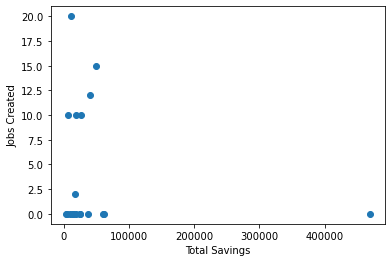

In [14]:
#scatter plot of jobs created versus average savings.
#Use both a standard and a logarithmic scale for the average savings. 

plt.scatter(df_combine['Total Savings'], df_combine['Job created'])
plt.xlabel('Total Savings');
plt.ylabel('Jobs Created');

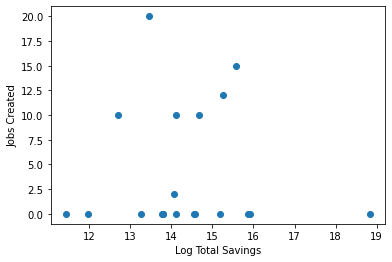

In [15]:
#scatter plot of jobs created versus average savings (logarithmic scale).
plt.scatter(np.log2(df_combine['Total Savings']),(df_combine['Job created']))
plt.xlabel('Log Total Savings');
plt.ylabel('Jobs Created');

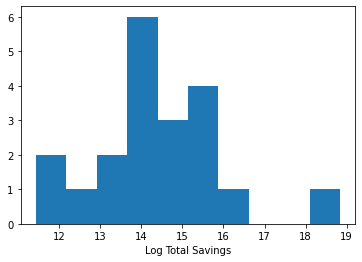

In [16]:
#histogram of the log of the average total savings
plt.hist(np.log2(df_combine['Total Savings']));
plt.xlabel('Log Total Savings');

In [76]:
df['month'] = pd.to_datetime(df['Effective Date']).dt.month

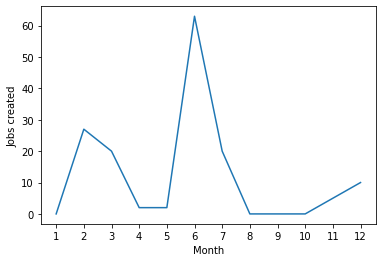

In [87]:
#line plot of the total jobs created for each month.

#extract the month from the effective date of each row
df['month'] = pd.to_datetime(df['Effective Date']).dt.month

#groupby month and sum the jobs created
plt.plot(df.groupby('month')['Job created'].sum())
plt.xticks(range(1,13));
plt.xlabel('Month');
plt.ylabel('Jobs created');